<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Lachin Naghashyar
### Student Number : 98110179
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preparation (10 points)
1.   Load Dataset
2.   Separate target feature
3.   Change class labels to 1 and -1
4.   Do train-test split

#### Load Dataset

In [3]:
df = pd.read_csv('heart_disease.csv')

In [4]:
df.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


They all have numerical values so there is no need to change the data types.

#### Separate target feature

In [6]:
y = df["target"].copy()
x = df.drop("target", axis=1)

#### Change class labels to 1 and -1

In [7]:
y[y == 0] = -1

####  Do train-test split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [9]:
plt.figure(figsize=(17,17))
sns.heatmap(data = df.corr(), annot=True, cmap="YlOrBr")
plt.show()

### Adaboost Algorithm Implementation (40 points)

In [32]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    # TODO : Calculate the weighted error of a weak classifier.
    return sum(w * (y != y_pred))/sum(w)
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1-error)/error)
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return w * np.exp(alpha * (y != y_pred))
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.y_preds = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                w = np.ones_like(y) / len(y)
            else:
                w = update_weights(w, alpha, y, y_pred)

            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            G_m = DecisionTreeClassifier(max_depth=1)
            G_m.fit(X, y, sample_weight=w)
            y_pred = G_m.predict(X)
            self.y_preds.append(y_pred)
            self.G_M.append(G_m)


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            err = calculate_error(y, y_pred, w)
            self.training_errors.append(err)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha = calculate_alpha(err)
            self.alphas.append(alpha)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [11]:
#TODO : Fit model
adaboost = AdaBoost()
adaboost.fit(x_train, y_train, M=200)

#TODO : Predict on test data
y_pred = adaboost.predict(x_test)

#TODO : Print evaluation metrics (Accuracy, Precision, Recall and f-score)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy = np.sum(y_pred == y_test)/len(y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
print(accuracy, precision, recall, f_score)

/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2069607534.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2069607534.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2069607534.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

0.8790560471976401 0.8848484848484849 0.8690476190476191 0.8768768768768769


/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2069607534.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2069607534.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2069607534.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

In [12]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
print(accuracy, precision, recall, f_score)

0.8967551622418879 0.9235668789808917 0.8630952380952381 0.8923076923076922


Results are very close with Scikit-learn results being slightly better.

### Early Stopping (15 points)

In [13]:
#TODO : Calculate validation error for different number of estimators
def calc_validation_err(n_estimators):
    clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred)
calc_validation_err(100)
calc_validation_err(200)
calc_validation_err(300)
calc_validation_err(400)
calc_validation_err(500)
calc_validation_err(600)
calc_validation_err(700)

0.8731563421828908
0.8967551622418879
0.9262536873156342
0.9410029498525073
0.9469026548672567
0.9557522123893806
0.9557522123893806


0.9557522123893806

In [14]:
#TODO : Plot validation error versus number of estimators figure.
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(AdaBoostClassifier(), x, y,
                                       param_name = "n_estimators",
                                       param_range = np.arange(100, 2000, 200),
                                        cv = 5, scoring = "accuracy")
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
plt.plot(np.arange(100, 2000, 200), mean_test_score,label = "Cross Validation Score", color = 'r')
# Creating the plot
plt.title("Validation Curve with AdaboostClassifier Classifier")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


We could also do this for the Adaboost that we have implemented:

In [15]:
for i in range(12):
    calc_validation_err(i*200+100)

0.8731563421828908
0.9262536873156342
0.9469026548672567
0.9557522123893806
0.9557522123893806
0.9646017699115044
0.9646017699115044
0.9646017699115044
0.9646017699115044
0.9646017699115044
0.9646017699115044
0.9646017699115044


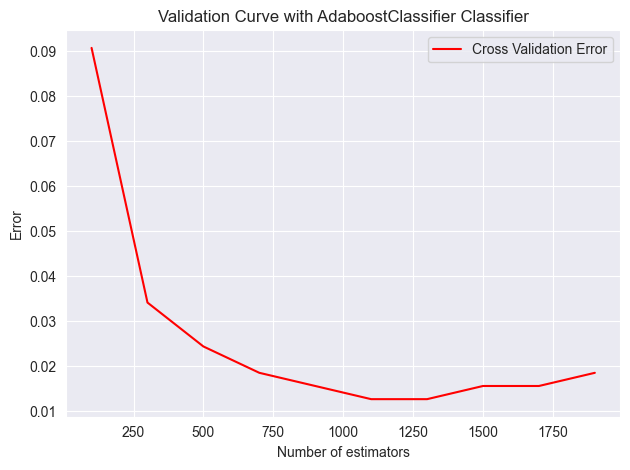

In [16]:
plt.plot(np.arange(100, 2000, 200), 1 - mean_test_score,label = "Cross Validation Error", color = 'r')
# Creating the plot
plt.title("Validation Curve with AdaboostClassifier Classifier")
plt.xlabel("Number of estimators")
plt.ylabel("Error")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [103]:
#TODO : Print the best number for estimators and minimum value for validation error.
print(np.min(1 - mean_test_score))
print(np.arange(100, 2000, 200)[np.argmin(100 - mean_test_score)])

0.012682926829268304
1100


We could also do this in the similar way as the class notebooks and for the Adaboost that we've implemented ourselves.

In [22]:
from sklearn.metrics import mean_squared_error

result={}
ada = AdaBoost()
for count_of_estimators in np.arange(100, 2000, 150):
  ada.fit(x_train, y_train, M=count_of_estimators)
  y_pred = ada.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)
  result[count_of_estimators]=val_error

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/104423085.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/104423085.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/104423085.py:64: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old

In [28]:
print("The best number for estimators is: "+ str(list(result.keys())[list(result.values()).index(min(list(result.values())))]))
print("The minimum value for validation error is: "+ str(min(list(result.values()))))

The best number for estimators is: 550
The minimum value for validation error is: 0.4837758112094395


### Weighted Error (10 points)

In [41]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
from sklearn.metrics import mean_squared_error

result={}
ada = AdaBoost()
for count_of_estimators in np.arange(100, 1000, 200):
  w = ada.fit(x_train, y_train, M=count_of_estimators)
  y_pred = ada.predict(x_test)
  result[count_of_estimators]=np.sum(np.asarray(ada.training_errors) * np.asarray(ada.alphas))

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("weighted training error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2363456252.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2363456252.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m
/var/folders/dy/lk5gdj_n0lj_x7cbh5kk78mm0000gn/T/ipykernel_3566/2363456252.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

because the number of estimators increases and hence, when summing over their errors, we will have a larger error value. This won't happen if we take average of them.